In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from test_model import test_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sc_sharp import scSHARP
import utilities
from sklearn import preprocessing

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
# create new dge without markers, Sycp1, Mllt10, Spaca1  highest in SPC attribution scores
old_counts = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/counts.csv", index_col=0)
new_counts = old_counts.drop(["Mllt10", "Sycp1", "Spaca1"], axis=1)
new_counts.to_csv("/home/groups/ConradLab/daniel/sharp_data/jung_ablation/ablated_counts.csv")

In [19]:
data_folders = ["/home/groups/ConradLab/daniel/sharp_data/jung/"]
tools = ["sctype","scsorter","scina"]
votes_necessary = .51
model_file = "configs/2_25.txt"
neighbors = 2
batch_size=20
training_epochs=0
random_inits = 5
counts="counts.csv"
meta="labels.csv"
meta_col = 0
results = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
results

[0.34682080149650574, 0.323699414730072, 0.24710983037948608, 0.42052024602890015, 0.44075143337249756]


/home/users/lewinsda/scSHARP/utilities.py:187: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return float((torch.tensor(preds) == torch.tensor(real)).type(torch.FloatTensor).mean().numpy())


,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,jung,GCN,0.355780,0.357276,0.334783,0.077991,0.088887,0.104935
1,jung,Max Col.,0.807803,0.865325,0.000000,0.000000,0.000000,0.000000
2,jung,Confident Labels,NaN,0.865325,NaN,0.000000,0.000000,0.000000
3,jung,sctype,0.848266,0.863777,0.630435,0.000000,0.000000,0.000000
4,jung,scsorter,0.774566,0.828173,0.021739,0.000000,0.000000,0.000000
5,jung,scina,0.539017,0.577399,0.000000,0.000000,0.000000,0.000000
6,jung,Tool Avg.,0.720617,0.756450,0.217391,0.161529,0.156081,0.357871


In [28]:
data_folders = ["/home/groups/ConradLab/daniel/sharp_data/jung_ablation/"]
tools = ["sctype","scsorter","scina"]
votes_necessary = .51
model_file = "configs/2_25.txt"
neighbors = 2
batch_size=20
training_epochs=0
random_inits = 5
counts="ablated_counts.csv"
meta="labels.csv"
meta_col = 0
results = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
results

[0.37716764211654663, 0.32225432991981506, 0.24566474556922913, 0.411849707365036, 0.4017341136932373]


/home/users/lewinsda/scSHARP/utilities.py:187: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return float((torch.tensor(preds) == torch.tensor(real)).type(torch.FloatTensor).mean().numpy())


,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,jung_ablation,GCN,0.351734,0.354899,0.310204,0.068703,0.081766,0.127775
1,jung_ablation,Max Col.,0.793353,0.853810,0.000000,0.000000,0.000000,0.000000
2,jung_ablation,Confident Labels,NaN,0.853810,NaN,0.000000,0.000000,0.000000
3,jung_ablation,sctype,0.650289,0.692068,0.102041,0.000000,0.000000,0.000000
4,jung_ablation,scsorter,0.783237,0.827372,0.204082,0.000000,0.000000,0.000000
5,jung_ablation,scina,0.540462,0.581649,0.000000,0.000000,0.000000,0.000000
6,jung_ablation,Tool Avg.,0.657996,0.700363,0.102041,0.121571,0.123071,0.102041


In [29]:
real_labels = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/labels.csv", index_col=0).iloc[:,0]
real_labels,keys = pd.factorize(real_labels, sort=True)
keys

Index(['spc', 'spd', 'spg'], dtype='object')

In [30]:
#train GCN on full data
data_path = "/home/groups/ConradLab/daniel/sharp_data/jung_ablation/counts.csv"
tool_preds = "/home/groups/ConradLab/daniel/sharp_data/jung_ablation/preds.csv"
tool_list = ["scina", "scsorter", "sctype"]
marker_path = "/home/groups/ConradLab/daniel/sharp_data/jung_ablation/markers.txt"
neighbors=2
config="configs/2_25.txt"
sharp = scSHARP(data_path, tool_preds, tool_list, marker_path, neighbors, config)

In [31]:
preds, train_nodes, test_nodes, keep_cells = sharp.run_prediction(training_epochs=150, thresh=0.51, batch_size=20, seed=8)

Loss in epoch 0 = 16.733681
Loss in epoch 10 = 0.021175
Loss in epoch 20 = 0.005412
Loss in epoch 30 = 0.002761
Loss in epoch 40 = 0.001529
Loss in epoch 50 = 0.000878
Loss in epoch 60 = 0.000655
Loss in epoch 70 = 0.000523
Loss in epoch 80 = 0.000295
Loss in epoch 90 = 0.000324
Loss in epoch 100 = 0.000210
Loss in epoch 110 = 0.000134
Loss in epoch 120 = 0.000204
Loss in epoch 130 = 0.000083
Loss in epoch 140 = 0.000080


In [32]:
results = utilities.validation_metrics(torch.tensor(real_labels[keep_cells]), preds.cpu(), train_nodes, test_nodes)
results

(0.8540462255477905,
 array([[155,  85,   4],
        [ 11, 145,   0],
        [  1,   0, 291]]),
 0.8538102507591248,
 array([[126,  80,   2],
        [ 11, 140,   0],
        [  1,   0, 283]]),
 0.8571428656578064,
 array([[29,  5,  2],
        [ 0,  5,  0],
        [ 0,  0,  8]]))

In [33]:
# run interpretation
int_df = sharp.run_interpretation()

int_df.columns = keys
reorg_keys = ["spg","spc","spd"]
int_df = int_df[reorg_keys]
int_df = int_df.abs()
scale_int_df = pd.DataFrame(preprocessing.scale(int_df, with_mean=False))
scale_int_df.columns = int_df.columns
scale_int_df.index = int_df.index

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


In [25]:
scale_int_df.loc[["Insl6","Piwil1","Pttg1","Spag6","Mllt10","Aurka"]]

,spg,spc,spd
Insl6,0.012821,4.028460,0.821032
Piwil1,0.030983,5.246641,0.183192
Pttg1,0.568294,2.913338,0.207213
Spag6,0.017112,6.091677,0.823921
Mllt10,0.485223,2.129012,0.030639
Aurka,0.043988,1.406065,0.120309


In [34]:
scale_int_df.loc[["Mllt10", "Sycp1", "Spaca1"]]

,spg,spc,spd
Mllt10,0.532958,1.819915,0.030861
Sycp1,4.856812,0.068200,0.111642
Spaca1,0.021091,0.449129,3.249248


[]

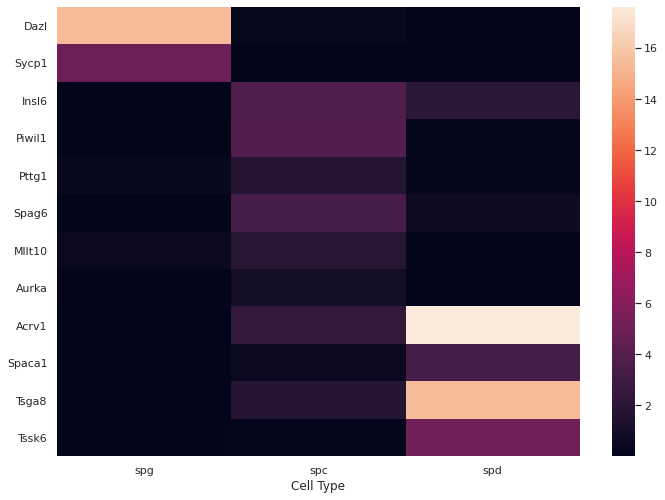

In [35]:
# actual markers heatmap
markers = ['Dazl','Sycp1','Insl6','Piwil1','Pttg1','Spag6','Mllt10','Aurka','Acrv1','Spaca1','Tsga8','Tssk6']
sns.set(rc={'figure.figsize':(11.7,8.27)})
#scale_int_df = np.arcsinh(scale_int_df)
ax = sns.heatmap(scale_int_df.loc[markers,:])
ax.set(xlabel="Cell Type")
plt.plot()

In [38]:
real_attributions = pd.read_csv("jung_interpretation.csv", index_col=0)
real_attributions.loc[["Mllt10", "Sycp1", "Spaca1"]]

,spg,spc,spd
Mllt10,0.204443,3.554583,0.128367
Sycp1,4.868067,1.394191,0.117887
Spaca1,0.030794,0.821353,5.755235


In [49]:
scale_int_df.loc[["Mllt10", "Sycp1", "Spaca1"]]

,spg,spc,spd
Mllt10,0.532958,1.819915,0.030861
Sycp1,4.856812,0.068200,0.111642
Spaca1,0.021091,0.449129,3.249248


/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

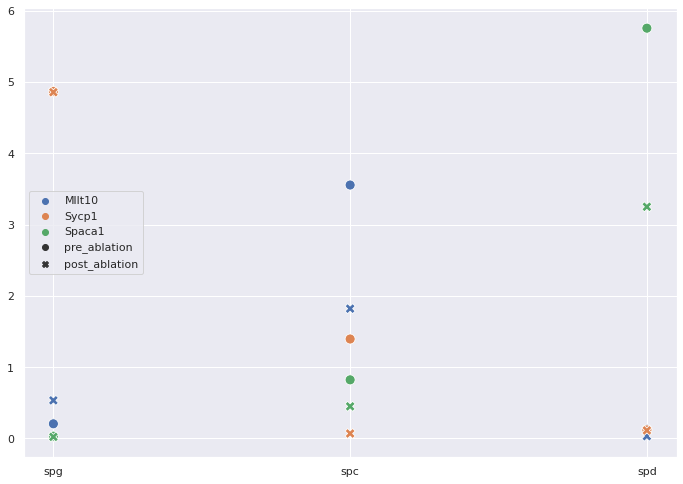

In [58]:
genes = ["Mllt10", "Sycp1", "Spaca1"]
real_atts = real_attributions.loc[genes, "spg"].tolist()
real_atts += real_attributions.loc[genes, "spc"].tolist()
real_atts += real_attributions.loc[genes, "spd"].tolist()
cell_types = ["spg", "spg", "spg", "spc", "spc", "spc", "spd", "spd", "spd"]
#genes = ["Mllt10", "Sycp1", "Spaca1"]
ablat_stat = ["pre_ablation"]*9
real_atts += scale_int_df.loc[genes, "spg"].tolist()
real_atts += scale_int_df.loc[genes, "spc"].tolist()
real_atts += scale_int_df.loc[genes, "spd"].tolist()
cell_types += ["spg", "spg", "spg", "spc", "spc", "spc", "spd", "spd", "spd"]
ablat_stat += ["post_ablation"]*9
sns.scatterplot(cell_types, real_atts, hue = genes*6, style=ablat_stat, s=100)

[0.2044431423932693, 4.868067061526274, 0.0307944594974599, 3.554583234724321, 1.3941909342311036, 0.8213530789176412, 0.1283665335204788, 0.117886747351661, 5.755234691979765]


<AxesSubplot:>

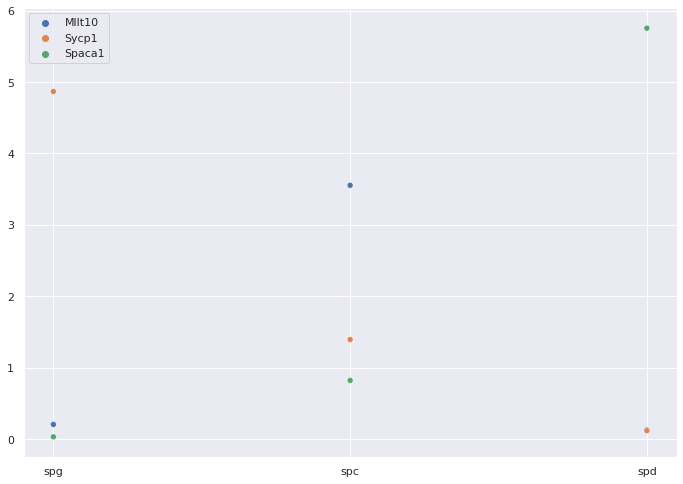

In [45]:
genes = ["Mllt10", "Sycp1", "Spaca1"]
real_atts = real_attributions.loc[genes, "spg"].tolist()
real_atts += real_attributions.loc[genes, "spc"].tolist()
real_atts += real_attributions.loc[genes, "spd"].tolist()
cell_types = ["spg", "spg", "spg", "spc", "spc", "spc", "spd", "spd", "spd"]
print(real_atts)
sns.scatterplot(cell_types, real_atts, hue = genes*3)

[0.5329581209193015, 4.856811917085795, 0.021090529866430886, 1.819914771214336, 0.0682002801664343, 0.4491287555407786, 0.030861161470596546, 0.11164191484320236, 3.2492482198400445]


/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

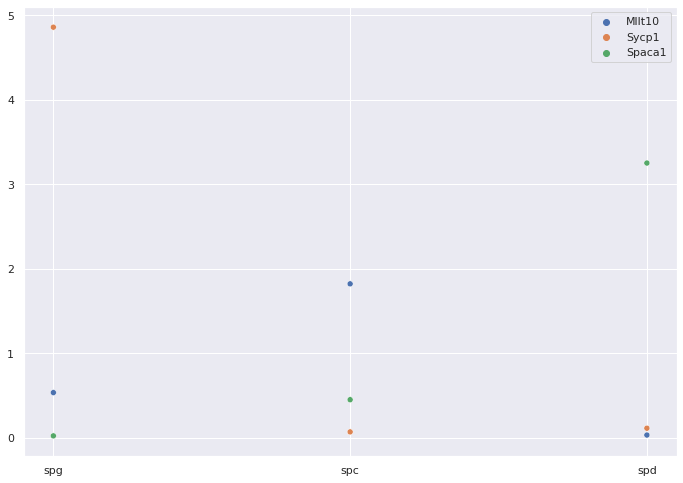

In [46]:
genes = ["Mllt10", "Sycp1", "Spaca1"]
real_atts = scale_int_df.loc[genes, "spg"].tolist()
real_atts += scale_int_df.loc[genes, "spc"].tolist()
real_atts += scale_int_df.loc[genes, "spd"].tolist()
cell_types = ["spg", "spg", "spg", "spc", "spc", "spc", "spd", "spd", "spd"]
print(real_atts)
sns.scatterplot(cell_types, real_atts, hue = genes*3)

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

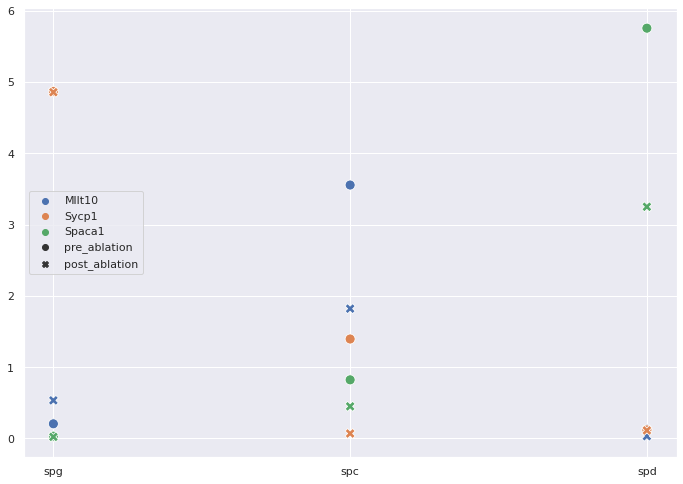